In [1]:
# %pip install fastf1

In [5]:
#Libraries import
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from timple.timedelta import strftimedelta
import seaborn as sns




In [6]:
#Import fastf1
import fastf1 as ff1
import fastf1.plotting
from fastf1.core import Laps

In [7]:
!pwd


/root/code/data_science/F1_data_analytics


In [8]:
#Enable cache:argument is path
cache = ff1.Cache.enable_cache('/root/code/data_science/F1_data_analytics')


In [9]:
#Specify your session
YEAR = 2023
RACE = "Bahrain"
SESSION = "Q"

# "SESSION" can either be 'FP1', 'FP2', 'FP3', 'Q', 'SQ', and 'R'
race = ff1.get_session(YEAR,RACE,SESSION)

In [10]:
#Load the session
race.load()

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v2.3.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
/root/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/fastf1/core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
/root/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/fastf1/core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
/root/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/fastf1/core.py:1415: FutureWarning: In a future vers

api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '55', '14', '63', '44', '18', '31', '27', '4', '77', '24', '22', '23', '2', '20', '81', '21', '10']


In [13]:
# laps = session.laps
laps = race.load_laps(with_telemetry=True)
laps

/root/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/fastf1/core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v2.3.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
/root/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/fastf1/core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
/root/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/fastf1/c

/root/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '55', '14', '63', '44', '18', '31', '27', '4', '77', '24', '22', '23', '2', '20', '81', '21', '10']


,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 00:27:20.459000,1,NaT,1,0 days 00:18:59.843000,0 days 00:21:06.934000,NaT,NaT,NaT,NaT,...,SOFT,1.0,True,1,0 days 00:18:59.843000,Red Bull Racing,VER,5,False,2023-03-04 15:04:00.840
1,0 days 00:29:32.394000,1,NaT,2,0 days 00:27:20.459000,NaT,NaT,0 days 00:00:53.666000,0 days 00:00:38.509000,NaT,...,SOFT,2.0,False,2,0 days 00:27:20.459000,Red Bull Racing,VER,1,False,2023-03-04 15:12:21.456
2,0 days 00:31:03.689000,1,0 days 00:01:31.295000,3,NaT,NaT,0 days 00:00:29.152000,0 days 00:00:39.195000,0 days 00:00:22.948000,0 days 00:30:01.546000,...,SOFT,3.0,False,2,0 days 00:29:32.394000,Red Bull Racing,VER,1,True,2023-03-04 15:14:33.391
3,0 days 00:32:53.501000,1,0 days 00:01:49.812000,4,NaT,0 days 00:32:51.749000,0 days 00:00:35.615000,0 days 00:00:44.953000,0 days 00:00:29.244000,0 days 00:31:39.304000,...,SOFT,4.0,False,2,0 days 00:31:03.689000,Red Bull Racing,VER,1,False,2023-03-04 15:16:04.686
4,0 days 00:40:05.688000,1,NaT,5,0 days 00:37:48.525000,NaT,NaT,0 days 00:00:53.390000,0 days 00:00:45.107000,NaT,...,SOFT,1.0,True,3,0 days 00:32:53.501000,Red Bull Racing,VER,1,False,2023-03-04 15:17:54.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0 days 00:32:13.869000,10,0 days 00:01:32.181000,2,NaT,NaT,0 days 00:00:29.330000,0 days 00:00:39.764000,0 days 00:00:23.087000,0 days 00:31:11.018000,...,SOFT,2.0,True,1,0 days 00:30:41.688000,Alpine,GAS,1,True,2023-03-04 15:15:42.685
250,0 days 00:34:06.375000,10,0 days 00:01:52.506000,3,NaT,0 days 00:34:03.170000,0 days 00:00:33.458000,0 days 00:00:47.084000,0 days 00:00:31.964000,0 days 00:32:47.327000,...,SOFT,3.0,True,1,0 days 00:32:13.869000,Alpine,GAS,1,False,2023-03-04 15:17:14.866
251,0 days 00:39:15.464000,10,NaT,4,0 days 00:36:54.776000,NaT,NaT,0 days 00:00:54.291000,0 days 00:00:45.228000,NaT,...,SOFT,1.0,True,2,0 days 00:34:06.375000,Alpine,GAS,1,False,2023-03-04 15:19:07.372
252,0 days 00:40:47.282000,10,0 days 00:01:31.818000,5,NaT,NaT,0 days 00:00:29.247000,0 days 00:00:39.412000,0 days 00:00:23.159000,0 days 00:39:44.711000,...,SOFT,2.0,True,2,0 days 00:39:15.464000,Alpine,GAS,1,True,2023-03-04 15:24:16.461


In [14]:
time = laps.Time

0     0 days 00:27:20.459000
1     0 days 00:29:32.394000
2     0 days 00:31:03.689000
3     0 days 00:32:53.501000
4     0 days 00:40:05.688000
               ...          
249   0 days 00:32:13.869000
250   0 days 00:34:06.375000
251   0 days 00:39:15.464000
252   0 days 00:40:47.282000
253   0 days 00:42:41.848000
Name: Time, Length: 254, dtype: timedelta64[ns]

In [12]:
laps.pick_fastest()

Time                      0 days 01:23:54.472000
DriverNumber                                   1
LapTime                   0 days 00:01:29.708000
LapNumber                                     14
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:28.736000
Sector2Time               0 days 00:00:38.514000
Sector3Time               0 days 00:00:22.458000
Sector1SessionTime        0 days 01:22:53.500000
Sector2SessionTime        0 days 01:23:32.014000
Sector3SessionTime        0 days 01:23:54.472000
SpeedI1                                    241.0
SpeedI2                                    271.0
SpeedFL                                    288.0
SpeedST                                    321.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife                                     2.0
FreshTyre                                  False
Stint               

In [23]:
#Give you one specific driver
ham_laps = laps.pick_driver('HAM')
ham_laps

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
95,0 days 00:30:18.693000,44,NaT,1,0 days 00:28:09.334000,NaT,NaT,0 days 00:00:53.124000,0 days 00:00:33.139000,NaT,...,SOFT,1.0,True,1,0 days 00:28:09.334000,Mercedes,HAM,1,False,2023-03-04 15:13:10.331
96,0 days 00:31:50.236000,44,0 days 00:01:31.543000,2,NaT,NaT,0 days 00:00:29.062000,0 days 00:00:39.442000,0 days 00:00:23.039000,0 days 00:30:47.755000,...,SOFT,2.0,True,1,0 days 00:30:18.693000,Mercedes,HAM,1,True,2023-03-04 15:15:19.690
97,0 days 00:33:50.077000,44,0 days 00:01:59.841000,3,NaT,0 days 00:33:48.248000,0 days 00:00:36.811000,0 days 00:00:52.194000,0 days 00:00:30.836000,0 days 00:32:27.047000,...,SOFT,3.0,True,1,0 days 00:31:50.236000,Mercedes,HAM,1,False,2023-03-04 15:16:51.233
98,0 days 00:40:14.755000,44,NaT,4,0 days 00:37:38.963000,NaT,NaT,0 days 00:01:01.262000,0 days 00:00:51.358000,NaT,...,SOFT,4.0,False,2,0 days 00:33:50.077000,Mercedes,HAM,1,False,2023-03-04 15:18:51.074
99,0 days 00:41:46.409000,44,0 days 00:01:31.654000,5,NaT,NaT,0 days 00:00:29.194000,0 days 00:00:39.479000,0 days 00:00:22.981000,0 days 00:40:43.949000,...,SOFT,5.0,False,2,0 days 00:40:14.755000,Mercedes,HAM,1,True,2023-03-04 15:25:15.752
100,0 days 00:43:38.937000,44,0 days 00:01:52.528000,6,NaT,0 days 00:43:37.128000,0 days 00:00:32.294000,0 days 00:00:48.820000,0 days 00:00:31.414000,0 days 00:42:18.703000,...,SOFT,6.0,False,2,0 days 00:41:46.409000,Mercedes,HAM,1,False,2023-03-04 15:26:47.406
101,0 days 00:53:22.306000,44,NaT,7,0 days 00:51:12.433000,NaT,NaT,0 days 00:00:56.329000,0 days 00:00:33.391000,NaT,...,SOFT,1.0,True,3,0 days 00:43:38.937000,Mercedes,HAM,1,False,2023-03-04 15:28:39.934
102,0 days 00:54:53.207000,44,0 days 00:01:30.901000,8,NaT,NaT,0 days 00:00:28.940000,0 days 00:00:39.166000,0 days 00:00:22.795000,0 days 00:53:51.246000,...,SOFT,2.0,True,3,0 days 00:53:22.306000,Mercedes,HAM,1,True,2023-03-04 15:38:23.303
103,0 days 00:56:45.025000,44,0 days 00:01:51.818000,9,NaT,0 days 00:56:43.239000,0 days 00:00:34.866000,0 days 00:00:49.637000,0 days 00:00:27.315000,0 days 00:55:28.073000,...,SOFT,3.0,True,3,0 days 00:54:53.207000,Mercedes,HAM,1,False,2023-03-04 15:39:54.204
104,0 days 01:02:30.280000,44,NaT,10,0 days 01:00:33.579000,NaT,NaT,0 days 00:00:51.295000,0 days 00:00:30.536000,NaT,...,SOFT,1.0,True,4,0 days 00:56:45.025000,Mercedes,HAM,1,False,2023-03-04 15:41:46.022


In [24]:
ham_laps.info()

<class 'fastf1.core.Laps'>
Int64Index: 15 entries, 95 to 109
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                15 non-null     timedelta64[ns]
 1   DriverNumber        15 non-null     object         
 2   LapTime             10 non-null     timedelta64[ns]
 3   LapNumber           15 non-null     int64          
 4   PitOutTime          5 non-null      timedelta64[ns]
 5   PitInTime           5 non-null      timedelta64[ns]
 6   Sector1Time         10 non-null     timedelta64[ns]
 7   Sector2Time         15 non-null     timedelta64[ns]
 8   Sector3Time         15 non-null     timedelta64[ns]
 9   Sector1SessionTime  10 non-null     timedelta64[ns]
 10  Sector2SessionTime  15 non-null     timedelta64[ns]
 11  Sector3SessionTime  15 non-null     timedelta64[ns]
 12  SpeedI1             15 non-null     float64        
 13  SpeedI2             15 non-null     float64   

In [27]:
#Let's get some telemetry
alo_laps = laps.pick_driver('ALO')
alo_fastest = alo_laps.pick_fastest()

In [28]:
alo_fastest.get_car_data()

/root/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/fastf1/core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time


,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime
0,2023-03-04 16:03:21.855,10708,291,8,99,False,12,car,0 days 00:00:00.082000,0 days 01:18:20.858000
1,2023-03-04 16:03:22.175,10827,295,8,99,False,12,car,0 days 00:00:00.402000,0 days 01:18:21.178000
2,2023-03-04 16:03:22.415,10892,295,8,99,False,12,car,0 days 00:00:00.642000,0 days 01:18:21.418000
3,2023-03-04 16:03:22.775,11032,299,8,99,False,12,car,0 days 00:00:01.002000,0 days 01:18:21.778000
4,2023-03-04 16:03:23.016,11073,301,8,99,False,12,car,0 days 00:00:01.243000,0 days 01:18:22.019000
...,...,...,...,...,...,...,...,...,...,...
338,2023-03-04 16:04:50.856,11374,272,7,99,False,14,car,0 days 00:01:29.083000,0 days 01:19:49.859000
339,2023-03-04 16:04:51.096,11428,277,7,99,False,12,car,0 days 00:01:29.323000,0 days 01:19:50.099000
340,2023-03-04 16:04:51.416,10756,281,7,99,False,12,car,0 days 00:01:29.643000,0 days 01:19:50.419000
341,2023-03-04 16:04:51.656,10461,283,8,99,False,12,car,0 days 00:01:29.883000,0 days 01:19:50.659000


In [29]:

# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl()

# load a session and its telemetry data
session = fastf1.get_session(2023, 'Bahrain', 'R')
session.load()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v2.3.1]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching track sta

api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for position_data. Loading data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for weather_data. Loading data...
api            INFO 	Fetching weather data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for race_control_messages. Loading data...
api            INFO 	Fetching race control messages...
api            INFO 	Data has been written to cache!
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']


In [30]:
#Load Verstappen and Hamilton fastest laps
ver_lap = session.laps.pick_driver('VER').pick_fastest()
ham_lap = session.laps.pick_driver('HAM').pick_fastest()

In [31]:
ver_lap.head()

Time            0 days 02:15:34.009000
DriverNumber                         1
LapTime         0 days 00:01:36.236000
LapNumber                           44
PitOutTime                         NaT
dtype: object

In [32]:
ham_lap.head()

Time            0 days 02:02:42.534000
DriverNumber                        44
LapTime         0 days 00:01:36.546000
LapNumber                           36
PitOutTime                         NaT
dtype: object

In [33]:
ver_lap

Time                      0 days 02:15:34.009000
DriverNumber                                   1
LapTime                   0 days 00:01:36.236000
LapNumber                                     44
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:30.783000
Sector2Time               0 days 00:00:42.005000
Sector3Time               0 days 00:00:23.448000
Sector1SessionTime        0 days 02:14:28.556000
Sector2SessionTime        0 days 02:15:10.561000
Sector3SessionTime        0 days 02:15:34.009000
SpeedI1                                    237.0
SpeedI2                                    245.0
SpeedFL                                    283.0
SpeedST                                    296.0
IsPersonalBest                              True
Compound                                    HARD
TyreLife                                     8.0
FreshTyre                                   True
Stint               

In [43]:
ver_tel = ver_lap.get_car_data()
ver_tel.info

/root/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/fastf1/core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time


<bound method DataFrame.info of                        Date    RPM  Speed  nGear  Throttle  Brake  DRS Source  \
0   2023-03-05 16:14:59.704  11300    285      7       100  False    0    car   
1   2023-03-05 16:14:59.984  11389    287      7       100  False    0    car   
2   2023-03-05 16:15:00.224  11438    288      7       100  False    0    car   
3   2023-03-05 16:15:00.384  11500    290      7       100  False    0    car   
4   2023-03-05 16:15:00.744  11528    291      7       100  False    0    car   
..                      ...    ...    ...    ...       ...    ...  ...    ...   
347 2023-03-05 16:16:34.904  11045    279      7       100  False    0    car   
348 2023-03-05 16:16:35.184  11146    281      7       100  False    0    car   
349 2023-03-05 16:16:35.344  11167    282      7       100  False    0    car   
350 2023-03-05 16:16:35.504  11208    284      7       100  False    0    car   
351 2023-03-05 16:16:35.704  11213    285      7       100  False    0    car

In [49]:
ver_tel = ver_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()

/root/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/fastf1/core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time


AttributeError: 'Telemetry' object has no attribute 'add_lap'

In [45]:
ver_tel

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2023-03-05 16:14:59.704,11300,285,7,100,False,0,car,0 days 00:00:00.082000,0 days 02:13:57.855000,6.491667
1,2023-03-05 16:14:59.984,11389,287,7,100,False,0,car,0 days 00:00:00.362000,0 days 02:13:58.135000,28.813889
2,2023-03-05 16:15:00.224,11438,288,7,100,False,0,car,0 days 00:00:00.602000,0 days 02:13:58.375000,48.013889
3,2023-03-05 16:15:00.384,11500,290,7,100,False,0,car,0 days 00:00:00.762000,0 days 02:13:58.535000,60.902778
4,2023-03-05 16:15:00.744,11528,291,7,100,False,0,car,0 days 00:00:01.122000,0 days 02:13:58.895000,90.002778
...,...,...,...,...,...,...,...,...,...,...,...
347,2023-03-05 16:16:34.904,11045,279,7,100,False,0,car,0 days 00:01:35.282000,0 days 02:15:33.055000,5288.852222
348,2023-03-05 16:16:35.184,11146,281,7,100,False,0,car,0 days 00:01:35.562000,0 days 02:15:33.335000,5310.707778
349,2023-03-05 16:16:35.344,11167,282,7,100,False,0,car,0 days 00:01:35.722000,0 days 02:15:33.495000,5323.241111
350,2023-03-05 16:16:35.504,11208,284,7,100,False,0,car,0 days 00:01:35.882000,0 days 02:15:33.655000,5335.863333


In [48]:
ver_tel.info()

<class 'fastf1.core.Telemetry'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   Date         352 non-null    datetime64[ns] 
 1   RPM          352 non-null    int64          
 2   Speed        352 non-null    int64          
 3   nGear        352 non-null    int64          
 4   Throttle     352 non-null    int64          
 5   Brake        352 non-null    bool           
 6   DRS          352 non-null    int64          
 7   Source       352 non-null    object         
 8   Time         352 non-null    timedelta64[ns]
 9   SessionTime  352 non-null    timedelta64[ns]
 10  Distance     352 non-null    float64        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(5), object(1), timedelta64[ns](2)
memory usage: 28.0+ KB


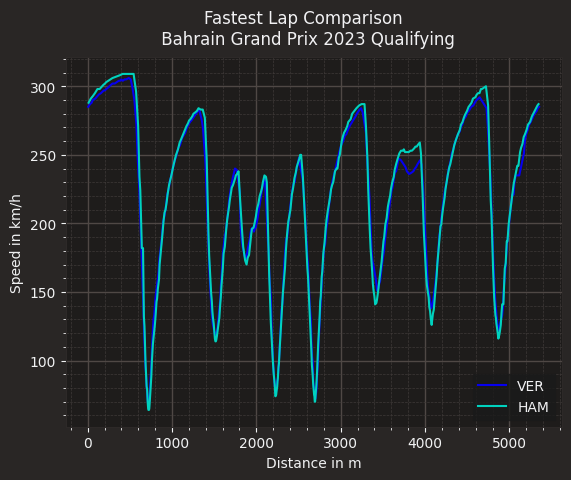

In [36]:
rbr_color = fastf1.plotting.team_color('RBR')
mer_color = fastf1.plotting.team_color('MER')

fig, ax = plt.subplots()
ax.plot(ver_tel['Distance'], ver_tel['Speed'], color=rbr_color, label='VER')
ax.plot(ham_tel['Distance'], ham_tel['Speed'], color=mer_color, label='HAM')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.show()

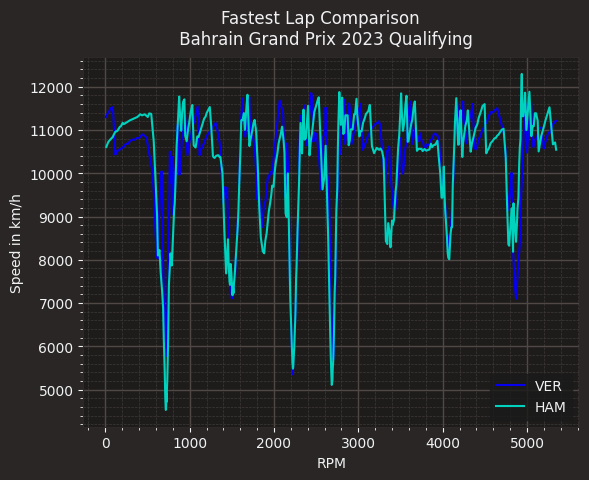

In [51]:
rbr_color = fastf1.plotting.team_color('RBR')
mer_color = fastf1.plotting.team_color('MER')

fig, ax = plt.subplots()
ax.plot(ver_tel['Distance'], ver_tel['RPM'], color=rbr_color, label='VER')
ax.plot(ham_tel['Distance'], ham_tel['RPM'], color=mer_color, label='HAM')

ax.set_xlabel('RPM')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.show()

In [52]:
drivers = pd.unique(session.laps['Driver'])
print(drivers)

['VER' 'PER' 'ALO' 'SAI' 'HAM' 'STR' 'RUS' 'BOT' 'GAS' 'ALB' 'TSU' 'SAR'
 'MAG' 'DEV' 'HUL' 'ZHO' 'NOR' 'OCO' 'LEC' 'PIA']


In [53]:
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)

In [81]:
list_fastest_laps

[Time                      0 days 02:15:34.009000
 DriverNumber                                   1
 LapTime                   0 days 00:01:36.236000
 LapNumber                                     44
 PitOutTime                                   NaT
 PitInTime                                    NaT
 Sector1Time               0 days 00:00:30.783000
 Sector2Time               0 days 00:00:42.005000
 Sector3Time               0 days 00:00:23.448000
 Sector1SessionTime        0 days 02:14:28.556000
 Sector2SessionTime        0 days 02:15:10.561000
 Sector3SessionTime        0 days 02:15:34.009000
 SpeedI1                                    237.0
 SpeedI2                                    245.0
 SpeedFL                                    283.0
 SpeedST                                    296.0
 IsPersonalBest                              True
 Compound                                    HARD
 TyreLife                                     8.0
 FreshTyre                                   True


In [80]:
fastest_laps = Laps(list_fastest_laps)
fastest_laps

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
43,0 days 02:15:34.009000,1,0 days 00:01:36.236000,44,NaT,NaT,0 days 00:00:30.783000,0 days 00:00:42.005000,0 days 00:00:23.448000,0 days 02:14:28.556000,...,HARD,8.0,True,3,0 days 02:13:57.773000,Red Bull Racing,VER,1,True,2023-03-05 16:14:59.622
93,0 days 02:03:57.494000,11,0 days 00:01:36.344000,37,NaT,NaT,0 days 00:00:30.919000,0 days 00:00:41.914000,0 days 00:00:23.511000,0 days 02:02:52.069000,...,HARD,3.0,True,3,0 days 02:02:21.150000,Red Bull Racing,PER,1,True,2023-03-05 16:03:22.999
149,0 days 02:02:43.133000,14,0 days 00:01:36.156000,36,NaT,NaT,0 days 00:00:30.895000,0 days 00:00:41.462000,0 days 00:00:23.799000,0 days 02:01:37.872000,...,HARD,2.0,True,3,0 days 02:01:06.977000,Aston Martin,ALO,1,True,2023-03-05 16:02:08.826
207,0 days 02:04:17.432000,55,0 days 00:01:37.130000,37,NaT,NaT,0 days 00:00:31.018000,0 days 00:00:42.443000,0 days 00:00:23.669000,0 days 02:03:11.320000,...,HARD,6.0,True,3,0 days 02:02:40.302000,Ferrari,SAI,1,True,2023-03-05 16:03:42.151
263,0 days 02:02:42.534000,44,0 days 00:01:36.546000,36,NaT,NaT,0 days 00:00:30.869000,0 days 00:00:42.013000,0 days 00:00:23.664000,0 days 02:01:36.857000,...,HARD,6.0,True,3,0 days 02:01:05.988000,Mercedes,HAM,1,True,2023-03-05 16:02:07.837
316,0 days 01:56:19.872000,18,0 days 00:01:36.546000,32,NaT,NaT,0 days 00:00:30.853000,0 days 00:00:41.993000,0 days 00:00:23.700000,0 days 01:55:14.179000,...,HARD,2.0,True,3,0 days 01:54:43.326000,Aston Martin,STR,1,True,2023-03-05 15:55:45.175
374,0 days 01:57:58.148000,63,0 days 00:01:37.221000,33,NaT,NaT,0 days 00:00:30.915000,0 days 00:00:42.756000,0 days 00:00:23.550000,0 days 01:56:51.842000,...,HARD,2.0,True,3,0 days 01:56:20.927000,Mercedes,RUS,1,True,2023-03-05 15:57:22.776
429,0 days 01:54:53.028000,77,0 days 00:01:37.379000,31,NaT,NaT,0 days 00:00:31.079000,0 days 00:00:42.337000,0 days 00:00:23.963000,0 days 01:53:46.728000,...,HARD,2.0,True,3,0 days 01:53:15.649000,Alfa Romeo,BOT,1,True,2023-03-05 15:54:17.498
497,0 days 02:13:36.300000,10,0 days 00:01:35.068000,42,NaT,NaT,0 days 00:00:30.069000,0 days 00:00:41.393000,0 days 00:00:23.606000,0 days 02:12:31.301000,...,SOFT,2.0,True,4,0 days 02:12:01.232000,Alpine,GAS,1,True,2023-03-05 16:13:03.081
555,0 days 02:15:15.265000,23,0 days 00:01:37.144000,43,NaT,NaT,0 days 00:00:30.767000,0 days 00:00:42.589000,0 days 00:00:23.788000,0 days 02:14:08.888000,...,SOFT,3.0,False,4,0 days 02:13:38.121000,Williams,ALB,1,True,2023-03-05 16:14:39.970


In [58]:
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)
fastest_laps

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 02:37:13.300000,24,0 days 00:01:33.996000,56,NaT,NaT,0 days 00:00:30.183000,0 days 00:00:40.533000,0 days 00:00:23.280000,0 days 02:36:09.487000,...,SOFT,5.0,False,4,0 days 02:35:39.304000,Alfa Romeo,ZHO,1,True,2023-03-05 16:36:41.153
1,0 days 02:13:36.300000,10,0 days 00:01:35.068000,42,NaT,NaT,0 days 00:00:30.069000,0 days 00:00:41.393000,0 days 00:00:23.606000,0 days 02:12:31.301000,...,SOFT,2.0,True,4,0 days 02:12:01.232000,Alpine,GAS,1,True,2023-03-05 16:13:03.081
2,0 days 02:29:42.967000,4,0 days 00:01:35.822000,51,NaT,NaT,0 days 00:00:30.749000,0 days 00:00:41.366000,0 days 00:00:23.707000,0 days 02:28:37.894000,...,SOFT,8.0,False,6,0 days 02:28:07.145000,McLaren,NOR,1,True,2023-03-05 16:29:08.994
3,0 days 02:13:47.370000,2,0 days 00:01:36.037000,42,NaT,NaT,0 days 00:00:30.492000,0 days 00:00:41.875000,0 days 00:00:23.670000,0 days 02:12:41.825000,...,SOFT,2.0,True,4,0 days 02:12:11.333000,Williams,SAR,1,True,2023-03-05 16:13:13.182
4,0 days 02:02:43.133000,14,0 days 00:01:36.156000,36,NaT,NaT,0 days 00:00:30.895000,0 days 00:00:41.462000,0 days 00:00:23.799000,0 days 02:01:37.872000,...,HARD,2.0,True,3,0 days 02:01:06.977000,Aston Martin,ALO,1,True,2023-03-05 16:02:08.826
5,0 days 02:15:34.009000,1,0 days 00:01:36.236000,44,NaT,NaT,0 days 00:00:30.783000,0 days 00:00:42.005000,0 days 00:00:23.448000,0 days 02:14:28.556000,...,HARD,8.0,True,3,0 days 02:13:57.773000,Red Bull Racing,VER,1,True,2023-03-05 16:14:59.622
6,0 days 02:03:57.494000,11,0 days 00:01:36.344000,37,NaT,NaT,0 days 00:00:30.919000,0 days 00:00:41.914000,0 days 00:00:23.511000,0 days 02:02:52.069000,...,HARD,3.0,True,3,0 days 02:02:21.150000,Red Bull Racing,PER,1,True,2023-03-05 16:03:22.999
7,0 days 02:13:59.893000,20,0 days 00:01:36.471000,42,NaT,NaT,0 days 00:00:30.737000,0 days 00:00:42.113000,0 days 00:00:23.621000,0 days 02:12:54.159000,...,SOFT,2.0,True,4,0 days 02:12:23.422000,Haas F1 Team,MAG,1,True,2023-03-05 16:13:25.271
8,0 days 02:02:42.534000,44,0 days 00:01:36.546000,36,NaT,NaT,0 days 00:00:30.869000,0 days 00:00:42.013000,0 days 00:00:23.664000,0 days 02:01:36.857000,...,HARD,6.0,True,3,0 days 02:01:05.988000,Mercedes,HAM,1,True,2023-03-05 16:02:07.837
9,0 days 01:56:19.872000,18,0 days 00:01:36.546000,32,NaT,NaT,0 days 00:00:30.853000,0 days 00:00:41.993000,0 days 00:00:23.700000,0 days 01:55:14.179000,...,HARD,2.0,True,3,0 days 01:54:43.326000,Aston Martin,STR,1,True,2023-03-05 15:55:45.175


In [60]:
pole_lap = fastest_laps.pick_fastest()
fastest_laps["LapTimeDelta"] = fastest_laps["LapTime"] -pole_lap["LapTime"]

In [64]:
print(fastest_laps[['Driver',"LapTime","LapTimeDelta","LapNumber"]])

   Driver                LapTime           LapTimeDelta  LapNumber
0     ZHO 0 days 00:01:33.996000        0 days 00:00:00         56
1     GAS 0 days 00:01:35.068000 0 days 00:00:01.072000         42
2     NOR 0 days 00:01:35.822000 0 days 00:00:01.826000         51
3     SAR 0 days 00:01:36.037000 0 days 00:00:02.041000         42
4     ALO 0 days 00:01:36.156000 0 days 00:00:02.160000         36
5     VER 0 days 00:01:36.236000 0 days 00:00:02.240000         44
6     PER 0 days 00:01:36.344000 0 days 00:00:02.348000         37
7     MAG 0 days 00:01:36.471000 0 days 00:00:02.475000         42
8     HAM 0 days 00:01:36.546000 0 days 00:00:02.550000         36
9     STR 0 days 00:01:36.546000 0 days 00:00:02.550000         32
10    HUL 0 days 00:01:36.616000 0 days 00:00:02.620000         42
11    TSU 0 days 00:01:36.637000 0 days 00:00:02.641000         42
12    OCO 0 days 00:01:36.797000 0 days 00:00:02.801000         34
13    SAI 0 days 00:01:37.130000 0 days 00:00:03.134000       

In [62]:
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)

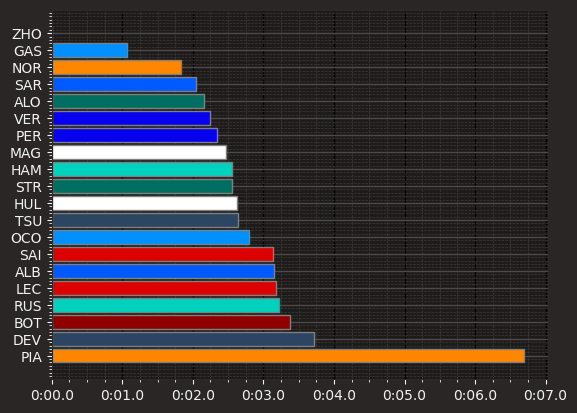

In [63]:
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

In [78]:
list_total_time = list()
for drv in drivers:
    drvs_total_time = session.laps.pick_driver(drv)
    list_total_time.append(drvs_total_time)

In [79]:
list_total_time = pd.DataFrame(list_total_time)
list_total_time

/root/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/pandas/core/internals/construction.py:569: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


,0
0,Time DriverNumber ...
1,Time DriverNumber ...
2,Time DriverNumber ...
3,Time DriverNumber ...
4,Time DriverNumber ...
5,Time DriverNumber ...
6,Time DriverNumber ...
7,Time DriverNumber ...
8,Time DriverNumber ...
9,Time DriverNumber ...


In [76]:
# total_time = Laps(list_total_time).sort_values(by='Time').reset_index(drop=True)
# total_time.head